In [47]:
import pandas as pd

df = pd.read_csv('Bike2.csv', encoding='utf8', index_col=0)

In [48]:
df2 = df

In [49]:
list_dong = df2['동'].unique().tolist()
df2['동'] = df2['동'].map(lambda x: list_dong.index(x))
list_st = df2['대여소근처역'].unique().tolist()
df2['대여소근처역'] = df2['대여소근처역'].map(lambda x: list_st.index(x))


In [50]:
df2['광고'].value_counts()

29    2868176
7      106172
13      82119
19      75476
27      74924
26      69727
25      68836
28      65383
2       59068
8       53314
17      49036
3       35546
15      28540
6       17836
12       9350
4        8685
0        7581
21       5142
1        4119
16       2389
5        1760
11       1493
23       1177
20        635
10        552
18        446
14        264
9         133
24         96
22         38
Name: 광고, dtype: int64

In [51]:
df2.head(3)

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류,광고
0,2022-06-01,0,742,0,1,1,1,2,2,1,0,2,0,4,0,0,29
1,2022-06-01,0,2059,0,1,1,1,1,1,1,0,2,1,21,1,1,29
2,2022-06-01,0,1349,0,1,1,1,0,0,0,0,2,2,17,2,2,29


In [52]:
#df['대여일자'] = df['대여일자'].apply(pd.Timestamp)
df2['대여일자'] = df2['대여일자'].astype(str)
df2['대여일자'] = df2['대여일자'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df2['대여일자'] = df2['대여일자'].astype(int)
df2.dtypes

대여일자       int32
대여시간       int64
대여소번호      int64
대여구분코드     int64
성별         int64
연령대코드      int64
이용건수       int64
운동량        int64
이동거리(M)    int64
이용시간(분)    int64
주말         int64
요일         int64
대여소근처역     int64
소재지        int64
동          int64
산업종류       int64
광고         int64
dtype: object

In [53]:
X = df2.drop(['광고'], axis=1)
Y = df2['광고']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [55]:
#기본적인 randomforest모형

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(X_train,Y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(Y_test,predict1))

0.7753054793384556


In [56]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error

print("RMSE: {}".format(sqrt(mean_squared_error(predict1, Y_test)))) # RMSE

RMSE: 7.625678524226407


In [13]:
# Xgboost

import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=0)

#dtrain = xgb.DMatrix(data=X_train, label=y_train)
#dval = xgb.DMatrix(data=X_val, label=y_val)
#dtest = xgb.DMatrix(data=X_test)

In [14]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

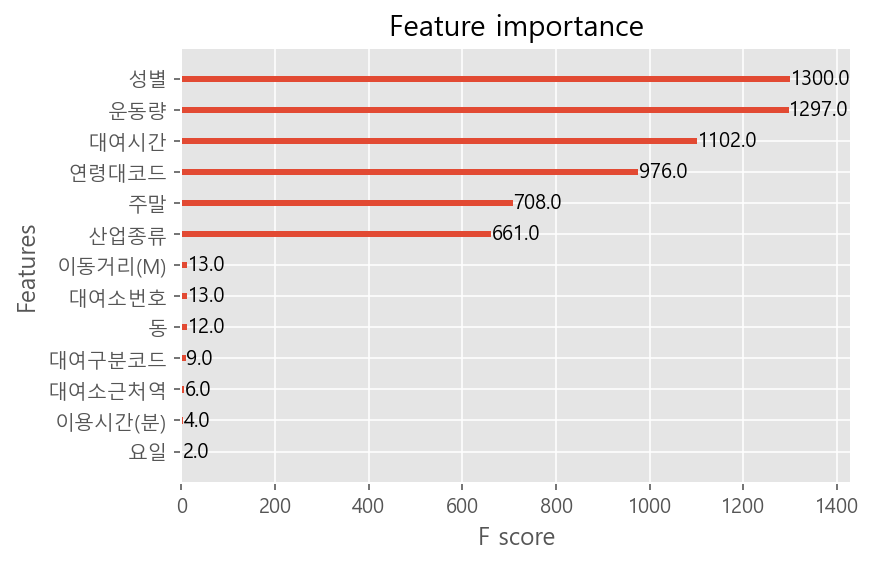

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

ax = xgboost.plot_importance(xgb_model)

In [ ]:
predictions = xgb_model.predict(X_test)
predictions

In [9]:
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'

In [ ]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))


In [21]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)
# early_stopping_rounds = 10 으로 설정
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, 
                eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)


[0]	validation_0-mlogloss:2.44540
[1]	validation_0-mlogloss:2.12239
[2]	validation_0-mlogloss:1.89925
[3]	validation_0-mlogloss:1.72675
[4]	validation_0-mlogloss:1.58475
[5]	validation_0-mlogloss:1.46644
[6]	validation_0-mlogloss:1.36412
[7]	validation_0-mlogloss:1.27520
[8]	validation_0-mlogloss:1.19588
[9]	validation_0-mlogloss:1.12539
[10]	validation_0-mlogloss:1.06148
[11]	validation_0-mlogloss:1.00435
[12]	validation_0-mlogloss:0.95304
[13]	validation_0-mlogloss:0.90566
[14]	validation_0-mlogloss:0.86304
[15]	validation_0-mlogloss:0.82378
[16]	validation_0-mlogloss:0.78752
[17]	validation_0-mlogloss:0.75408
[18]	validation_0-mlogloss:0.72298
[19]	validation_0-mlogloss:0.69432
[20]	validation_0-mlogloss:0.66719
[21]	validation_0-mlogloss:0.64221
[22]	validation_0-mlogloss:0.61851
[23]	validation_0-mlogloss:0.59628
[24]	validation_0-mlogloss:0.57513
[25]	validation_0-mlogloss:0.55546
[26]	validation_0-mlogloss:0.53685
[27]	validation_0-mlogloss:0.51979
[28]	validation_0-mlogloss:0.5

NameError: name 'get_clf_eval' is not defined

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    F1 = f1_score(y_test, y_pred, average='weighted')
    #AUC = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    #print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, ws10_preds)

오차행렬:
 [[   300      0      0      0      0      0      0      0      0      0
       0      0      0    162      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0    194]
 [     0      0      0      0      0      0      0    355      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [     0      0   1810      0      0      0      0   3396      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [     0      0      0   2126      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0   1031
       0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0    601      0      0      0      0      0
       0      0      0      0      0      0      0   

C:\Users\smdhk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)

In [15]:
ax.figure.savefig('xgboost.png', facecolor='w')

In [41]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 0) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(2588609, 16) (1109404, 16) (2588609,) (1109404,)


In [42]:
#XGBoost
from math import sqrt
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgb_model.fit(train_x,train_y)
xgb_model_predict = xgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(xgb_model_predict, test_y)))) # RMSE

RMSE: 2.53429585287709


In [14]:
import shap
explainer = shap.TreeExplainer(xgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [15]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [24]:
import matplotlib.pyplot as plt
plt.savefig('explainer.png')

<Figure size 432x288 with 0 Axes>

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


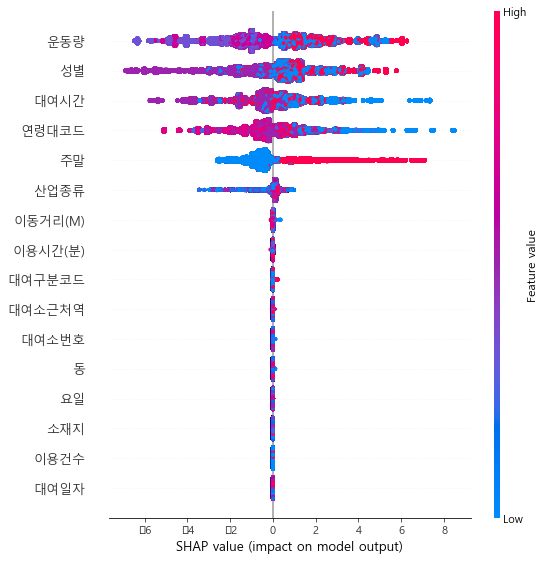

In [19]:
shap.summary_plot(shap_values, test_x)

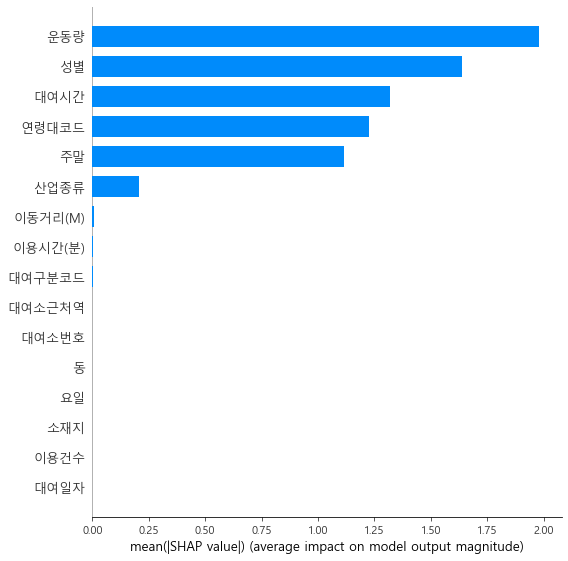

In [20]:
shap.summary_plot(shap_values, test_x, plot_type = "bar")